Shape of X:  (2, 10000)
Shape of Xavg:  (2,)
U [[-0.49758975 -0.8674125 ]
 [-0.8674125   0.49758975]]
S [1.99598346 0.49708534]
VT [[ 0.0026063   0.01223626  0.00197446 ... -0.0043462   0.01393029
   0.01221715]
 [ 0.00193118 -0.00390288 -0.00656172 ...  0.00761669  0.01277629
  -0.0152861 ]]


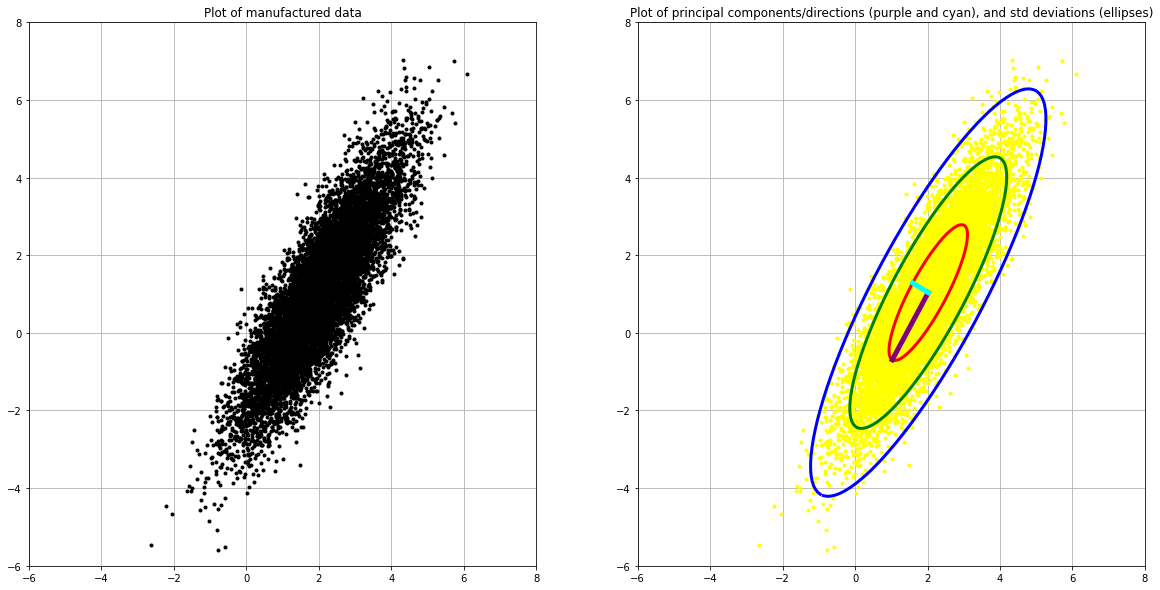

U  [[-0.49758975 -0.8674125 ]
 [-0.8674125   0.49758975]]
S  [1.99598346 0.49708534]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by 60 degress, counter-clockwise

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
print('Shape of X: ', X.shape)

fig = plt.figure()
ax1 = fig.add_subplot(121, title="Plot of manufactured data")
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

## f_ch01_ex03_1b

Xavg = np.mean(X, axis=1)                 # Compute mean
print('Shape of Xavg: ', Xavg.shape)
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)
# U, S, VT = np.linalg.svd(B,full_matrices=False)

print('U', U)
print('S', S)
print('VT', VT)

ax2 = fig.add_subplot(122, title="Plot of principal components/directions (purple and cyan), and std deviations (ellipses)")
ax2.plot(X[0,:],X[1,:], '.', color='yellow')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + 1*Xstd[0,:], Xavg[1] + 1*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='g',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='b',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
#
# https://www.youtube.com/watch?v=fkf4IBRSeEc&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=22
# Principal components: T = U @ Sigma
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='purple',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()

print('U ', U)
print('S ', S)

In [108]:
import numpy as np

POPULATION = 5000


#######################
# AGE related
#######################
# age: 20 to 100
ages = np.random.normal(loc=40, scale=20, size=POPULATION)
ages = np.int8(ages)
ages = np.clip(ages, 20, 100)

# years_smoking = np.random.uniform(low=40, high=ages, size=POPULATION)
years_smoking = ages - 25
years_smoking = np.int8(years_smoking)
years_smoking = np.clip(years_smoking, 0, 40)

diabetes_likelihood = 2.5 * years_smoking / 50
diabetes_likelihood = np.clip(diabetes_likelihood, 0, 0.99)

bone_densities = 0.9 + 50. / ages


#######################
# EXERCISE related
#######################
exercise_hours = np.random.normal(loc=1, scale=1, size=POPULATION)
exercise_hours = np.clip(exercise_hours, 0, 5)

muscle_strengths = 0.4 + 0.2 * exercise_hours

bmis = 30 * 2 / (0.1 + exercise_hours)


#######################
# IQ related
#######################
iqs = np.random.normal(loc=100, scale=20, size=POPULATION)
iqs = np.int8(iqs)
iqs = np.clip(iqs, 40, 200)

gpas = 4.0 * iqs / 200



#######################
# IQ related
#######################

cancer_probs = ages / 110
# print(cancer_probs.shape)
# print(cancer_probs[:20])
# print(cancer_probs[-20:])

rng = np.random.default_rng()
got_cancers = rng.binomial(1, cancer_probs)
# print("GOT ")
# print(got_cancers.shape)
# print(got_cancers[:20])
# print(got_cancers[-20:])


X = np.zeros((POPULATION, 9))
X[:, 0] = ages
X[:, 1] = years_smoking
X[:, 2] = diabetes_likelihood
X[:, 3] = bone_densities
X[:, 4] = exercise_hours
X[:, 5] = muscle_strengths
X[:, 6] = bmis
X[:, 7] = iqs
X[:, 8] = gpas



means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# print(means)
B = (X - means)
B = B / stds
# print(B.shape)
# print(B[:15])
# print(B[-5:])



U, S, VT = np.linalg.svd(B/np.sqrt(POPULATION),full_matrices=False)


VT 0
[ 499.20564132  502.94084122  495.32316405 -501.00469844   12.88340546
   12.88340546   -4.43934375  -23.89373517  -23.89373517]
VT 1
[ -11.56599332  -11.49039011   -8.89530559    9.07887328  600.51350771
  600.51350771 -521.40495674  -56.90593793  -56.90593793]
VT 2
[ 12.77906039  14.53923762  18.61112303 -18.64988434  46.23349748
  46.23349748 -48.50148917 704.38045369 704.38045369]
[1.94836619e+00 1.61549251e+00 1.41212095e+00 6.27454065e-01
 3.84421501e-01 2.17045197e-01 1.06679224e-01 2.96096546e-14
 2.60265156e-16]


--
(array([0, 1, 2, 3]),)
VT  0
[ 0.49920564  0.50294084  0.49532316 -0.5010047   0.01288341  0.01288341
 -0.00443934 -0.02389374 -0.02389374]

--
(array([4, 5, 6]),)
VT  1
[-0.01156599 -0.01149039 -0.00889531  0.00907887  0.60051351  0.60051351
 -0.52140496 -0.05690594 -0.05690594]

--
(array([7, 8]),)
VT  2
[ 0.01277906  0.01453924  0.01861112 -0.01864988  0.0462335   0.0462335
 -0.04850149  0.70438045  0.70438045]



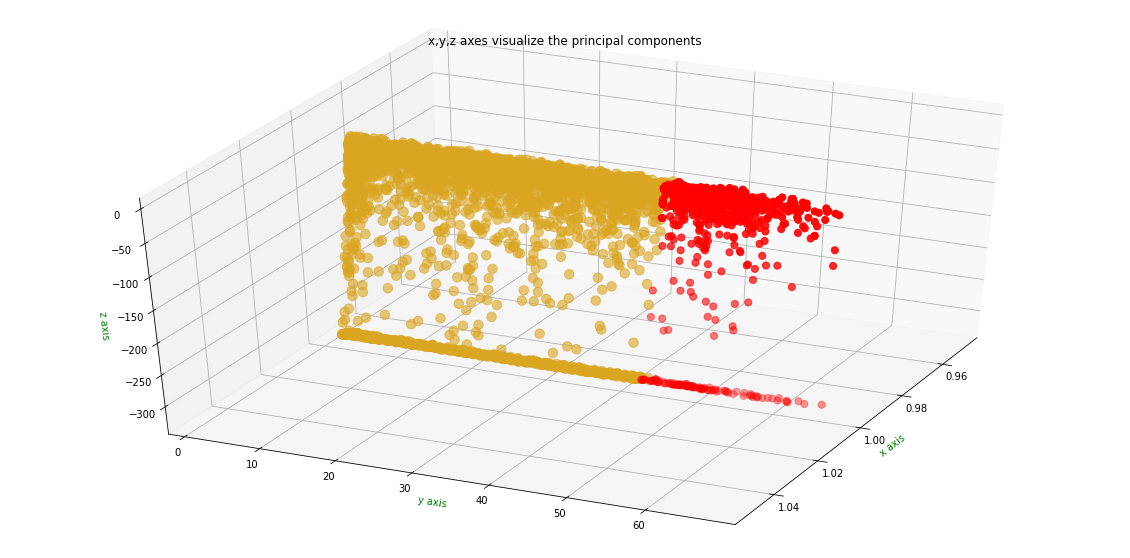

In [131]:
for i in np.arange(0, 3):
  print("--")
  columnV = VT[i, :]
  summation = np.sum(columnV)
  print(np.where( np.abs(columnV / summation) > 0.15 ))
  print('VT ', i )
  print(columnV)
  print( )


import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]
 
# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(POPULATION),full_matrices=False)

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d', title='x,y,z axes visualize the principal components')
ax.set_xlabel('x axis', color='g')
ax.set_ylabel('y axis', color='g')
ax.set_zlabel('z axis', color='g')

bx = []
by = []
bz = []
cx = []
cy = []
cz = []

for j in range(X.shape[0]):
    y = VT[0,:] @ X[j,:].T   # get the magnitude of the observation in the direction of the first column of V 
    z = VT[1,:] @ X[j,:].T   # get the magnitude of the observation in the direction of the second column of V 
    x = VT[2,:] @ X[j,:].T
    x = 1
    # y = 0
    # z = 0
    
    if cancer_probs[j] > .55:
        cx.append(x)
        cy.append(y)
        cz.append(z)
    else:
        bx.append(x)
        by.append(y)
        bz.append(z)


# ax.plot3D(cx,cy,cz, 'gray')
ax.scatter(bx,by,bz, marker='o',c="goldenrod", alpha=0.6,s=90)  
ax.scatter3D(cx,cy,cz, marker='o',color='r',s=50)

ax.view_init(40,25)
# ax.view_init(elev=10., azim=ii)
plt.show()